In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from IPython.display import Image
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from numpy import*
import nltk
nltk.download('punkt')
from nltk.tokenize import  word_tokenize
import sklearn
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import precision_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<h2>Question 8</h2>

<h5> 8(a) </h5>

In [2]:
spam_data = pd.read_csv('spam.csv')
#Sklearn Decision Tree cannot compute Categorical Variables
#We changed Yes & No in Label (Spam Column) to 1 & 0 Respectively
spam_data =spam_data.replace(to_replace=['yes','no'],value=[1,0])
spam_data=spam_data.drop(['isuid', 'id','domain', 'spampct', 'category','cappct'], axis=1)

In [3]:
#We transformed the spam dataframe so that all categorical variables can be represented by numerical values
#To avoid giving different weightage to non-ordinal variables, we used get_dummies function from pandas library 
spam_data = pd.get_dummies(spam_data, prefix_sep='_', drop_first=True)
spam_data= spam_data.sample(frac=1)
#Normalize the data
spam_data=((spam_data - spam_data.min())/(spam_data.max() - spam_data.min()))*(1 - 0) + 0

In [4]:
#Splitting the data in 10-Fold Cross Validation
df_split = np.array_split(spam_data, 10)

<h5> 8(b) </h5>

In [5]:
from sklearn.ensemble import RandomForestClassifier
def random_forest(df_split,n):
    accuracy=[]
    error=[]
    auc_score=[]
    for i in range(0,len(df_split)):

        data=df_split
        data = df_split.copy()
        test=data.pop(i)
    
        testy=test['spam'].to_numpy()
        testX=test.drop('spam',axis=1).to_numpy()
    
        train = pd.concat(data)
    
        trainy=train['spam'].to_numpy()
        trainX=train.drop('spam',axis=1).to_numpy()
    
        clf = RandomForestClassifier(n_estimators=n, random_state=0)
        clf = clf.fit(trainX, trainy)
    
        prediction=clf.predict(testX)
        accuracy_val=sklearn.metrics.accuracy_score(testy, prediction, normalize=True, sample_weight=None)
        error_val=1-accuracy_val
        auc_score_val=roc_auc_score(testy, prediction)
        accuracy.append(accuracy_val)
        error.append(error_val)
        auc_score.append(auc_score_val)
        
    accuracy.append(mean(accuracy))
    error.append(mean(error))
    auc_score.append(mean(auc_score))
    df = pd.DataFrame(list(zip(accuracy, error,auc_score)), columns =['Accuracy', 'Error','AUC_Score'])
    df.rename(index={0: "Fold1", 1: "Fold2", 2: "Fold3", 3: "Fold4", 4: "Fold5", 5: "Fold6", 6: "Fold7", 7: "Fold8", 8: "Fold9", 9: "Fold10", 10: "Mean"},inplace=True)
    return df

In [6]:
print('For Number of Trees',10)
random_forest(df_split,10)

For Number of Trees 10


,Accuracy,Error,AUC_Score
Fold1,0.903670,0.096330,0.888522
Fold2,0.944700,0.055300,0.936580
Fold3,0.917051,0.082949,0.902809
Fold4,0.953917,0.046083,0.951769
Fold5,0.926267,0.073733,0.914051
Fold6,0.894009,0.105991,0.871831
Fold7,0.926267,0.073733,0.894534
Fold8,0.917051,0.082949,0.901200
Fold9,0.903226,0.096774,0.879804
Fold10,0.940092,0.059908,0.921269


In [7]:
print('For Number of Trees',25)
random_forest(df_split,25)

For Number of Trees 25


,Accuracy,Error,AUC_Score
Fold1,0.917431,0.082569,0.906007
Fold2,0.935484,0.064516,0.930170
Fold3,0.940092,0.059908,0.926605
Fold4,0.963134,0.036866,0.965468
Fold5,0.930876,0.069124,0.924277
Fold6,0.912442,0.087558,0.895352
Fold7,0.926267,0.073733,0.894534
Fold8,0.940092,0.059908,0.934984
Fold9,0.935484,0.064516,0.924372
Fold10,0.944700,0.055300,0.936251


In [8]:
print('For Number of Trees',50)
random_forest(df_split,50)

For Number of Trees 50


,Accuracy,Error,AUC_Score
Fold1,0.917431,0.082569,0.906007
Fold2,0.935484,0.064516,0.930170
Fold3,0.940092,0.059908,0.929638
Fold4,0.958525,0.041475,0.958619
Fold5,0.930876,0.069124,0.924277
Fold6,0.903226,0.096774,0.888310
Fold7,0.930876,0.069124,0.906630
Fold8,0.944700,0.055300,0.938480
Fold9,0.930876,0.069124,0.917523
Fold10,0.940092,0.059908,0.932873


In [9]:
print('For Number of Trees',100)
random_forest(df_split,100)

For Number of Trees 100


,Accuracy,Error,AUC_Score
Fold1,0.926606,0.073394,0.912810
Fold2,0.949309,0.050691,0.954760
Fold3,0.935484,0.064516,0.923059
Fold4,0.953917,0.046083,0.951769
Fold5,0.930876,0.069124,0.924277
Fold6,0.894009,0.105991,0.878122
Fold7,0.930876,0.069124,0.906630
Fold8,0.944700,0.055300,0.938480
Fold9,0.935484,0.064516,0.924372
Fold10,0.944700,0.055300,0.936251


<h5> 8(c) </h5>

In [10]:
#Naive Bayes
def Naivebayes(x_train,y_train,x_test,y_test):# This function retuns the AUC Score,Error Rate and accuracy of the model in predicting the test data
    model = GaussianNB()
    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    accuracy = model.score(x_test, y_test)#Calculates the accuracy of our model on testing data
    error=(1-accuracy)
    score=roc_auc_score(y_test, pred)
    
    return (score*100),(accuracy*100),(error*100),pred

In [11]:
def naive_cal(df_split):
    accuracy=[]
    error=[]
    auc_score=[]
    naive_pred=[]
    for i in range(0,len(df_split)):

        data=df_split
        data = df_split.copy()
        test=data.pop(i)
    
        testy=test['spam'].to_numpy()
        testX=test.drop('spam',axis=1).to_numpy()
    
        train = pd.concat(data)
    
        trainy=train['spam'].to_numpy()
        trainX=train.drop('spam',axis=1).to_numpy()
        
        (auc_score_val,accuracy_val,error_val,pred)=Naivebayes(trainX,trainy,testX,testy)
        
        for n in range(len(pred)):
            naive_pred.append(pred[n])
        accuracy.append(accuracy_val)
        error.append(error_val)
        auc_score.append(auc_score_val)
    

    accuracy.append(mean(accuracy))
    error.append(mean(error))
    auc_score.append(mean(auc_score))
    
    df = pd.DataFrame(list(zip(accuracy, error,auc_score)), columns =['Accuracy', 'Error','AUC_Score'])
    df.rename(index={0: "Fold1", 1: "Fold2", 2: "Fold3", 3: "Fold4", 4: "Fold5", 5: "Fold6", 6: "Fold7", 7: "Fold8", 8: "Fold9", 9: "Fold10", 10: "Mean"},inplace=True)
    return df,naive_pred

In [12]:
print('Naive Bayes')
df,naive_pred=naive_cal(df_split)
df

Naive Bayes


,Accuracy,Error,AUC_Score
Fold1,91.743119,8.256881,90.600747
Fold2,88.018433,11.981567,86.175914
Fold3,89.400922,10.599078,87.901269
Fold4,91.244240,8.755760,90.363394
Fold5,92.165899,7.834101,90.044711
Fold6,88.940092,11.059908,85.572770
Fold7,89.400922,10.599078,84.949393
Fold8,91.244240,8.755760,89.444339
Fold9,93.548387,6.451613,91.761796
Fold10,90.322581,9.677419,88.650607


In [13]:
#Knn with k=9
def Knn(k,x_train,y_train,x_test,y_test):# This function retuns the AUC Score,Error Rate and accuracy of the model in predicting the test data
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    accuracy = model.score(x_test, y_test)#Calculates the accuracy of our model on testing data
    error=(1-accuracy)# Error Rate
    score=roc_auc_score(y_test, pred)#AUC Score

    return (score*100),(accuracy*100),(error*100),pred

In [14]:
def knn_cal(df_split):
    accuracy=[]
    error=[]
    auc_score=[]
    knn_pred=[]
    
    for i in range(0,len(df_split)):

        data=df_split
        data = df_split.copy()
        test=data.pop(i)
    
        testy=test['spam'].to_numpy()
        testX=test.drop('spam',axis=1).to_numpy()
    
        train = pd.concat(data)
    
        trainy=train['spam'].to_numpy()
        trainX=train.drop('spam',axis=1).to_numpy()
        
        (auc_score_val,accuracy_val,error_val,pred)=Knn(9,trainX,trainy,testX,testy)
        
        knn_pred.append(pred)    
        accuracy.append(accuracy_val)
        error.append(error_val)
        auc_score.append(auc_score_val)
        

    accuracy.append(mean(accuracy))
    error.append(mean(error))
    auc_score.append(mean(auc_score))
    
    df = pd.DataFrame(list(zip(accuracy, error,auc_score)), columns =['Accuracy', 'Error','AUC_Score'])
    df.rename(index={0: "Fold1", 1: "Fold2", 2: "Fold3", 3: "Fold4", 4: "Fold5", 5: "Fold6", 6: "Fold7", 7: "Fold8", 8: "Fold9", 9: "Fold10", 10: "Mean"},inplace=True)
    return df,pred

In [15]:
print('KNN with k=9')
df,knn_pred=knn_cal(df_split)
df

KNN with k=9


,Accuracy,Error,AUC_Score
Fold1,92.660550,7.339450,91.281019
Fold2,91.705069,8.294931,90.237495
Fold3,90.322581,9.677419,88.003919
Fold4,93.548387,6.451613,93.112633
Fold5,92.626728,7.373272,91.405061
Fold6,89.400922,10.599078,87.183099
Fold7,89.861751,10.138249,87.039474
Fold8,89.861751,10.138249,88.069363
Fold9,92.165899,7.834101,91.057839
Fold10,92.165899,7.834101,90.775558


In [16]:
#SVM with c=0.1
def svm_func(c,x_train,y_train,x_test,y_test):
        clf = SVC(kernel='linear', random_state=0, gamma='auto', C=c)
        clf=clf.fit(x_train, y_train)
        prediction=clf.predict(x_test)
        accuracy=sklearn.metrics.accuracy_score(y_test, prediction, normalize=True, sample_weight=None)
        error=1-accuracy
        score=roc_auc_score(y_test, prediction)
    
        return (score*100),(accuracy*100),(error*100),prediction

In [17]:
def svm_cal(df_split):
    accuracy=[]
    error=[]
    auc_score=[]
    svm_pred=[]
    
    for i in range(0,len(df_split)):

        data=df_split
        data = df_split.copy()
        test=data.pop(i)
    
        testy=test['spam'].to_numpy()
        testX=test.drop('spam',axis=1).to_numpy()
    
        train = pd.concat(data)
    
        trainy=train['spam'].to_numpy()
        trainX=train.drop('spam',axis=1).to_numpy()
        
        (auc_score_val,accuracy_val,error_val,pred)=svm_func(0.1,trainX,trainy,testX,testy)
        
        svm_pred.append(pred)
        accuracy.append(accuracy_val)
        error.append(error_val)
        auc_score.append(auc_score_val)
    
        
    accuracy.append(mean(accuracy))
    error.append(mean(error))
    auc_score.append(mean(auc_score))
    
    df = pd.DataFrame(list(zip(accuracy, error,auc_score)), columns =['Accuracy', 'Error','AUC_Score'])
    df.rename(index={0: "Fold1", 1: "Fold2", 2: "Fold3", 3: "Fold4", 4: "Fold5", 5: "Fold6", 6: "Fold7", 7: "Fold8", 8: "Fold9", 9: "Fold10", 10: "Mean"},inplace=True)
    return df,pred

In [18]:
print('SVM with c=0.1')
df,svm_pred=svm_cal(df_split)
df

SVM with c=0.1


,Accuracy,Error,AUC_Score
Fold1,89.449541,10.550459,89.992335
Fold2,88.940092,11.059908,91.309374
Fold3,87.557604,12.442396,88.302538
Fold4,89.400922,10.599078,90.663052
Fold5,92.626728,7.373272,93.093607
Fold6,89.861751,10.138249,90.995305
Fold7,90.322581,9.677419,92.651822
Fold8,87.096774,12.903226,88.579664
Fold9,92.165899,7.834101,93.759513
Fold10,89.861751,10.138249,91.020368


<h5>8(d) </h5>

In [19]:
comparision_df = pd.DataFrame(list(zip(naive_pred,knn_pred,svm_pred)), columns =['Naive Prediction', 'KNN Prediction','SVM Prediction'])

In [20]:
prediction=comparision_df.mode(axis=1)
comparision_df

,Naive Prediction,KNN Prediction,SVM Prediction
0,0.0,1.0,1.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,1.0,1.0
...,...,...,...
212,1.0,1.0,1.0
213,1.0,0.0,0.0
214,1.0,1.0,1.0
215,0.0,0.0,0.0


In [21]:
def SVM_predictor(x_train,y_train,x_test,y_test):# This function retuns the AUC Score,Error Rate and accuracy of the model in predicting the test data
    model = SVC(kernel='linear', random_state=0, gamma='auto', C=0.1)
    model=model.fit(x_train, y_train)
    pred=model.predict(x_test)
    return pred

In [22]:
def decision_predictor(x_train,y_train,x_test,y_test):# This function retuns the AUC Score,Error Rate and accuracy of the model in predicting the test data
    model = tree.DecisionTreeClassifier()
    model = model.fit(x_train, y_train)
    pred=model.predict(x_test)
    return pred

In [23]:
def Naive_predictor(x_train,y_train,x_test,y_test):# This function retuns the AUC Score,Error Rate and accuracy of the model in predicting the test data
    model = GaussianNB()
    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    return pred

In [24]:
def ensemble_cal(df_split):
    accuracy=[]
    error=[]
    auc_score=[]
    
    for i in range(0,len(df_split)):
        predict_list=[]

        data=df_split
        data = df_split.copy()
        test=data.pop(i)
    
        testy=test['spam'].to_numpy()
        testX=test.drop('spam',axis=1).to_numpy()
    
        train = pd.concat(data)
    
        trainy=train['spam'].to_numpy()
        trainX=train.drop('spam',axis=1).to_numpy()
        
        svm_predict=SVM_predictor(trainX,trainy,testX,testy)
        naive_predict=Naive_predictor(trainX,trainy,testX,testy)
        decision_predict=decision_predictor(trainX,trainy,testX,testy)
        
        df_cal = pd.DataFrame(list(zip(naive_predict, decision_predict,svm_predict)), columns =['Naive', 'Decision','SVM'])
        prediction=df_cal.mode(axis=1)
        prediction=prediction.T
        prediction=np.asarray(prediction)
        prediction=prediction[0]
        
        accuracy_val=sklearn.metrics.accuracy_score(testy, prediction, normalize=True, sample_weight=None)
        error_val=1-accuracy_val
        auc_score_val=roc_auc_score(testy, prediction)
        
        accuracy.append(accuracy_val)
        error.append(error_val)
        auc_score.append(auc_score_val)
        
    accuracy.append(mean(accuracy))
    error.append(mean(error))
    auc_score.append(mean(auc_score))
    df = pd.DataFrame(list(zip(accuracy, error,auc_score)), columns =['Accuracy', 'Error','AUC_Score'])
    df.rename(index={0: "Fold1", 1: "Fold2", 2: "Fold3", 3: "Fold4", 4: "Fold5", 5: "Fold6", 6: "Fold7", 7: "Fold8", 8: "Fold9", 9: "Fold10", 10: "Mean"},inplace=True)
    return df

In [25]:
ensemble_cal(df_split)

,Accuracy,Error,AUC_Score
Fold1,0.912844,0.087156,0.902606
Fold2,0.935484,0.064516,0.935162
Fold3,0.917051,0.082949,0.917973
Fold4,0.935484,0.064516,0.937881
Fold5,0.940092,0.059908,0.941353
Fold6,0.898618,0.101382,0.881643
Fold7,0.921659,0.078341,0.904453
Fold8,0.907834,0.092166,0.903988
Fold9,0.940092,0.059908,0.937976
Fold10,0.903226,0.096774,0.898110


<h5> 8(e) </h5>

In [26]:
def ensemble_boost(df_split,n):
    accuracy=[]
    error=[]
    auc_score=[]
    for i in range(0,len(df_split)):

        data=df_split
        data = df_split.copy()
        test=data.pop(i)
    
        testy=test['spam'].to_numpy()
        testX=test.drop('spam',axis=1).to_numpy()
    
        train = pd.concat(data)
    
        trainy=train['spam'].to_numpy()
        trainX=train.drop('spam',axis=1).to_numpy()
    
        
        clf = AdaBoostClassifier(n_estimators=n, random_state=0)
        clf=clf.fit(trainX, trainy)
        
        prediction=clf.predict(testX)
        accuracy_val=sklearn.metrics.accuracy_score(testy, prediction, normalize=True, sample_weight=None)
        error_val=1-accuracy_val
        auc_score_val=roc_auc_score(testy, prediction)
        accuracy.append(accuracy_val)
        error.append(error_val)
        auc_score.append(auc_score_val)
        
    accuracy.append(mean(accuracy))
    error.append(mean(error))
    auc_score.append(mean(auc_score))
    df = pd.DataFrame(list(zip(accuracy, error,auc_score)), columns =['Accuracy', 'Error','AUC_Score'])
    df.rename(index={0: "Fold1", 1: "Fold2", 2: "Fold3", 3: "Fold4", 4: "Fold5", 5: "Fold6", 6: "Fold7", 7: "Fold8", 8: "Fold9", 9: "Fold10", 10: "Mean"},inplace=True)
    return df

In [27]:
ensemble_boost(df_split,50)

,Accuracy,Error,AUC_Score
Fold1,0.940367,0.059633,0.930296
Fold2,0.944700,0.055300,0.941572
Fold3,0.894009,0.105991,0.875980
Fold4,0.930876,0.069124,0.927654
Fold5,0.930876,0.069124,0.924277
Fold6,0.921659,0.078341,0.902394
Fold7,0.944700,0.055300,0.920901
Fold8,0.921659,0.078341,0.907957
Fold9,0.930876,0.069124,0.920900
Fold10,0.912442,0.087558,0.897131


In [28]:
ensemble_boost(df_split,100)

,Accuracy,Error,AUC_Score
Fold1,0.935780,0.064220,0.923254
Fold2,0.935484,0.064516,0.935162
Fold3,0.894009,0.105991,0.885078
Fold4,0.940092,0.059908,0.934599
Fold5,0.930876,0.069124,0.924277
Fold6,0.921659,0.078341,0.905540
Fold7,0.944700,0.055300,0.929706
Fold8,0.921659,0.078341,0.907957
Fold9,0.926267,0.073733,0.917428
Fold10,0.912442,0.087558,0.897131


<h2>Question 9</h2>

In [29]:
#9a

In [30]:
data1 = pd.read_csv('sotu/party.txt', header = None)
data1.rename(columns={0: 'party', 1: 'Name', 2: 'Year'}, inplace=True)

In [31]:
from glob import glob
k=[]
filenames = []
for j in range(1,232):
    filenames.append('C:/Users/nikhi/Downloads/ADM/Assignments/P4_Beta-1/sotu/files/a'+str(j)+'.txt')
for f in filenames:
    data=open(f).readlines()
    for n,line in enumerate(data):
        if line.startswith("line"):
            data[n] = "\n"+line.rstrip()
        else:
            data[n]=line.rstrip()        
    k.append(' '.join(data))  
data1['speech']=k 
data1

,party,Name,Year,speech
0,n,washington,1790,i embrace with great satisfaction the opportun...
1,n,washington,1790,fellowcitizens of the senate and house of repr...
2,n,washington,1791,fellowcitizens of the senate and house of repr...
3,n,washington,1792,fellowcitizens of the senate and house of repr...
4,n,washington,1793,fellowcitizens of the senate and house of repr...
...,...,...,...,...
226,d,obama,2013,mr speaker mr vice president members of congre...
227,d,obama,2014,mr speaker mr vice president members of congre...
228,d,obama,2015,mr speaker mr vice president members of congre...
229,d,obama,2016,mr speaker mr vice president members of congre...


In [32]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(data1.speech)
#print(X_train_counts.toarray())
print(X_train_counts)

  (0, 8050)	1
  (0, 27378)	11
  (0, 10825)	4
  (0, 21547)	2
  (0, 24613)	96
  (0, 16954)	1
  (0, 27224)	18
  (0, 16567)	1
  (0, 18761)	1
  (0, 13434)	1
  (0, 16772)	67
  (0, 4976)	1
  (0, 27741)	11
  (0, 16867)	3
  (0, 18754)	2
  (0, 9325)	1
  (0, 19221)	1
  (0, 17091)	10
  (0, 19342)	5
  (0, 539)	3
  (0, 19911)	1
  (0, 167)	1
  (0, 12160)	2
  (0, 23277)	2
  (0, 16501)	1
  :	:
  (230, 22539)	1
  (230, 13468)	4
  (230, 22249)	2
  (230, 24095)	4
  (230, 16849)	4
  (230, 13498)	4
  (230, 13513)	3
  (230, 13469)	1
  (230, 8765)	1
  (230, 19507)	1
  (230, 6029)	1
  (230, 6558)	1
  (230, 19876)	1
  (230, 3020)	1
  (230, 3574)	1
  (230, 17339)	2
  (230, 15121)	1
  (230, 21386)	1
  (230, 8613)	1
  (230, 6773)	1
  (230, 10747)	1
  (230, 2465)	1
  (230, 20451)	1
  (230, 9832)	1
  (230, 2735)	1


In [33]:
# 9b

In [34]:
stop='sotu\stopwords.txt'
k1=[]
data=open(stop).readlines()
for n,line in enumerate(data):
    if line.startswith("line"):
        data[n] = "\n"+line.rstrip()
    else:
        data[n]=line.rstrip()         
k1.append(data)
leas=[]
for i in range(0,231):
    line = ' '.join([word for word in (data1['speech'].tolist())[i].split() 
                               if word not in k1[0]])
    leas.append(line)
data1['speech']=leas 

In [35]:
#Training Data
data2=data1.copy()
data9=data2[data2['party'].isin(['r','d'])]
d3 = data2[data2['Year'].isin([2017,2014,2006,1995,1962])].index
data2.drop(d3, inplace=True)
data3 = data2[data2['party'].isin(['r','d'])]

In [36]:
#Testing Data
data12=data1.copy()
data11=data12[data12['Year'].isin([2017,2014,2006,1995,1962])]

In [37]:
data3=data3.reset_index()
d6 = data3[data3['party']=='d']
d7 = data3[data3['party']=='r']
demindex=(data3[data3['party']=='d'].index).tolist()
repindex=(data3[data3['party']=='r'].index).tolist()

In [38]:
data9=data9.reset_index()
uy=data9[data9['Year'].isin([2017,2014,2006,1995,1962])].index
uy

Int64Index([126, 160, 171, 179, 182], dtype='int64')

In [39]:
#9(c)(1)

In [40]:
def TDMatrix(data1):
    p=data1.speech.tolist()
    vec = CountVectorizer()
    y = vec.fit_transform(p)
    #converting our vectorization output into a dataframe                      
    frame1 = pd.DataFrame(y.toarray(), columns=vec.get_feature_names())
    frame2=frame1
    frame3 = frame2.sum().to_frame().reset_index()
    #To get the top 3000 words in frequency                      
    frame3 = frame3.sort_values(by=0,ascending=False, inplace=False).head(3000)                      
    ut = frame3['index'].tolist()
    dataf1 = frame2[ut]
    dataf2=dataf1.T
    return dataf2

In [41]:
fina=TDMatrix(data9)
fina=fina.drop(uy,axis=1)
fina

,0,1,2,3,4,5,6,7,8,9,...,170,172,173,174,175,176,177,178,180,181
government,58,68,26,36,43,74,69,57,71,64,...,14,15,11,7,13,18,8,9,5,4
states,46,78,34,34,53,65,49,57,60,74,...,5,11,5,4,6,5,10,12,9,6
congress,20,27,19,14,24,52,50,29,29,31,...,15,12,27,10,10,10,15,17,13,5
united,23,32,12,12,44,54,45,29,30,60,...,5,12,4,5,7,4,6,9,7,3
people,23,37,10,20,8,21,22,30,14,17,...,18,17,30,20,32,31,21,18,22,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lakes,0,0,1,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
kindly,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
effectual,0,1,1,0,0,0,1,0,2,2,...,0,0,0,0,0,0,0,0,0,0
bolivia,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
#9(c)(2)

<h2>Bernoulli model of Naive Bayes</h2>

In [43]:
def Trainbernoulli(data3):#Here data3 will be the dataframe with training data in it
    fina=TDMatrix(data3)
    h=fina.index.tolist()
    k=data3['party'].value_counts()# docs in each class
    lo=(k.index)
    d6 = data3[data3['party']==lo[0]]#dataframe with democratic speeches
    d7 = data3[data3['party']==lo[1]]#dataframe with republic speeches
    demindex=(data3[data3['party']==lo[0]].index).tolist()# indexes of the democratic speeches in the training data
    repindex=(data3[data3['party']==lo[1]].index).tolist()# indexes of the republic speeches in the training data
    k4=[repindex,demindex]
    priorprob=[]
    condiprob=[]
    condisum=[]
    N=len(data3)# total number of docs
    for i in range(len(k)):
        priorprob.append(k[i]/N)
        final1=fina.T
        data10 = final1.drop(k4[i])
        data10=data10.clip_upper(1)
        data10=data10.T
        #print(data10)
        data10['sum']=data10.sum(axis=1)
        data10['condi']=(data10['sum']+1)/(k[i]+2)
        condisum.append(data10['sum'].tolist())
        condiprob.append(data10['condi'].tolist())
    return condiprob,h,priorprob,k   

In [44]:
def ApplyBernoulis(data11,priorprob,condiprob,h,k):# Here data11 will be the dataframe containing the testing speeches
    z=data11['speech'].tolist()
    sai=[]
    for t in range(len(z)):
        res1 = word_tokenize(z[t])
        res1=[x.lower() for x in res1]
        s = set(h)
        res = [x for x in res1 if x in s]# matching the words that are in the speeches of training data and the testing speech
        for i in range(len(k)):
            resul=0
            resul=resul+math.log10(priorprob[i])
            for j in range(len(h)):
                if h[j] in res:
                    resul=resul+math.log10(condiprob[i][j])
                else:
                    resul=resul+math.log10(1-condiprob[i][j])
            sai.append(resul)
    return sai

In [45]:
(condiprob,h,priorprob,k)=Trainbernoulli(data3)
sai=ApplyBernoulis(data11,priorprob,condiprob,h,k)
les1=[sai[0],sai[2],sai[4],sai[6],sai[8]]
les2=[sai[1],sai[3],sai[5],sai[7],sai[9]]
df10 = pd.DataFrame(list(zip(les1, les2)), 
               columns =['p(C=Dem|x)', 'p(C=rep|x)']) 
pred=[] 
act=['d','d','r','d','r']
for i in range(len(df10)):
    if(df10['p(C=Dem|x)'][i]>df10['p(C=rep|x)'][i]):
        pred.append('d')
    else:pred.append('r')
df10['predected output']=pred
df10['Actual output']=act
df10
        

C:\Users\nikhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead


,p(C=Dem|x),p(C=rep|x),predected output,Actual output
0,-709.707890,-716.924829,d,d
1,-652.069945,-675.592364,d,d
2,-684.667334,-704.201397,d,r
3,-713.639617,-741.723353,d,d
4,-661.041163,-681.577499,d,r


In [46]:
# Testing on the example
lise=['Chinese Beijing Chinese','Chinese Chinese Shanghai','Chinese Macao','Tokyo Japan Chinese']
lise1=['c','c','c','n']
df20 = pd.DataFrame(list(zip(lise, lise1)), 
               columns =['speech', 'party']) 
test=['Chinese Chinese Chinese Tokyo Japan']       
df21=pd.DataFrame(test,columns=['speech'])
df21

,speech
0,Chinese Chinese Chinese Tokyo Japan


In [47]:
(condiprob,h,priorprob,k)=Trainbernoulli(df20)
print(condiprob)
sai=ApplyBernoulis(df21,priorprob,condiprob,h,k)
print(sai)

[[0.8, 0.4, 0.2, 0.4, 0.4, 0.2], [0.6666666666666666, 0.3333333333333333, 0.6666666666666666, 0.3333333333333333, 0.3333333333333333, 0.6666666666666666]]
[-2.285335007137463, -1.6586075456620497]


C:\Users\nikhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead


We have tested our bernoulis naive bayes classifier on the example we are getting the correct values as we see the above result. it is predicting the testing sample to be of class not china

In [48]:
##9(c)(3)

<h2>Multinomial model of Naive Bayes<h2>

In [49]:
def TrainMulti(data3):#Here data3 will be the dataframe with training data in it
    fina=TDMatrix(data3) 
    h=fina.index.tolist()#exact vocabulary 
    priorprob=[]
    remind=[]
    condiprob=[]
    condisum=[]
    raw=[]
    N=len(data3)# total number of docs
    k=data3['party'].value_counts()# docs in each class
    lo=(k.index)
    d6 = data3[data3['party']==lo[0]]#dataframe with democratic speeches
    d7 = data3[data3['party']==lo[1]]#dataframe with republic speeches
    demindex=(data3[data3['party']==lo[0]].index).tolist()# indexes of the democratic speeches in the training data
    repindex=(data3[data3['party']==lo[1]].index).tolist()# indexes of the republican speeches in the training data
    ret=[d6,d7]
    k4=[repindex,demindex]# list containing the indices of republic and democratic speeches
    for i in range(len(k)):
        priorprob.append(k[i]/N)
        finaei = (fina.T).drop(k4[i])
        dat10=finaei.T
        raw.append(fina.index.tolist())
        #print(raw)
        #print(dat10)
        dat10['sum']=dat10.sum(axis=1)
        dat10['sum1']= dat10['sum']+1
        term=dat10['sum'].sum()
        #print(dat10)
        #print(term)
        dat10['condi']=(dat10['sum']+1)/(term+len(h))# finding the conditional probabilities
        #print(dat10)
        condisum.append(dat10['sum'].tolist())
        condiprob.append(dat10['condi'].tolist()) 
        remind.append(dat10)# this list contains both the dataframes of document term matrices of republican and democratic 
    return condiprob,h,priorprob,k,remind

In [50]:
def ApplyMulti(data11,priorprob,condiprob,h,k,remind):#data11 is the dataframe containing the 5 testing speeches
    z=data11['speech'].tolist()
    f=[]
    sai=[]
    for t in range(len(z)):
        res1 = word_tokenize(z[t])# Tokenizing the individual speeches
        res1=[x.lower() for x in res1]
        #res=list(set(h).intersection(res1))
        s = set(h)# matching the words that are in the speeches of training data and the testing speech
        res = [x for x in res1 if x in s]
        #print(res)
        #print(res1)
        #print(dat10)
        for i in range(len(k)):
            resul=0
            date=remind[i]
            f=date.index.tolist()
            resul=resul+math.log10(priorprob[i])
            #print(resul)
            #print(f)
            for j in range(len(res)):
                lol=f.index(res[j])
                #print(lol)
                condiprob=date['condi'][lol]
                resul=resul+math.log10(condiprob)# Adding the conditional probability of the words
                #print(resul)
            sai.append(resul)        
    return sai      

In [51]:
(condiprob,h,priorprob,k,remind)=TrainMulti(data3)
sai=ApplyMulti(data11,priorprob,condiprob,h,k,remind)
les1=[sai[0],sai[2],sai[4],sai[6],sai[8]]
les2=[sai[1],sai[3],sai[5],sai[7],sai[9]]
df10 = pd.DataFrame(list(zip(les1, les2)), 
               columns =['p(C=Dem|x)', 'p(C=rep|x)']) 
pred=[] 
act=['d','d','r','d','r']
for i in range(len(df10)):
    if(df10['p(C=Dem|x)'][i]>df10['p(C=rep|x)'][i]):
        pred.append('d')
    else:pred.append('r')
df10['predected output']=pred
df10['Actual output']=act
df10

,p(C=Dem|x),p(C=rep|x),predected output,Actual output
0,-6962.297409,-7008.302520,d,d
1,-6451.239341,-6545.392355,d,d
2,-5931.459311,-5952.137847,d,r
3,-7254.702000,-7380.587906,d,d
4,-4891.146322,-4925.709734,d,r


In [52]:
#Testing on example from IR book
(condiprob,h,priorprob,k,remind)=TrainMulti(df20)
sai=ApplyMulti(df21,priorprob,condiprob,h,k,remind)
print(sai)

[-3.5211251638485592, -3.8681225602046814]


We have tested our bernoulis naive bayes classifier on the example we are getting the correct values as we can see above results. It is predicting our testing sample to be of class china

<h2>Question 10</h2>

Text(0.5, 0, 'file names')

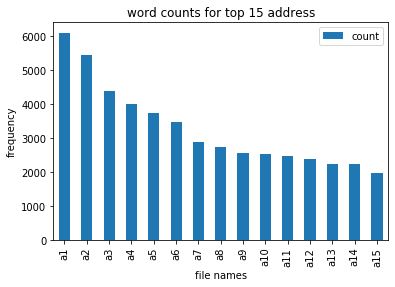

In [53]:
fina=TDMatrix(data9)
fina['sum']=fina.sum(axis=1)  
t=fina['sum'].tolist()
d = pd.DataFrame(t,columns = ['count'])
d=d.head(15)
d.index = ['a1','a2','a3','a4','a5','a6','a7','a8','a9','a10','a11','a12','a13','a14','a15']
d.plot(kind='bar')
plt.title("word counts for top 15 address")
plt.ylabel("frequency")
plt.xlabel("file names")

Text(0.5, 0, 'words')

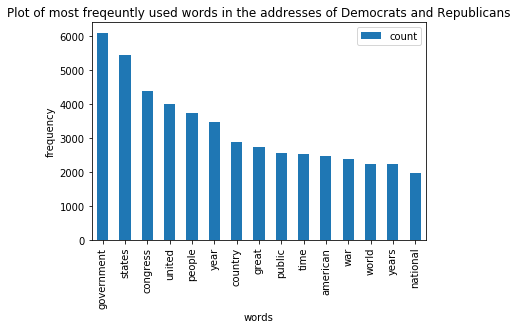

In [54]:
fina1=fina.sort_values(by=['sum'],ascending=False)
t1=fina1.index.tolist()
t=fina['sum'].tolist()
d = pd.DataFrame(t,columns = ['count'])
d=d.head(15)
d.index = t1[:15]
d.plot(kind='bar')
plt.title("Plot of most freqeuntly used words in the addresses of Democrats and Republicans")
plt.ylabel("frequency")
plt.xlabel("words")